# Import Liberaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# Import Datasets

In [2]:
path= '/content/KPMG_VI_New_raw_data_update_final (1).xlsx'

In [3]:
df_transactions= pd.read_excel(path, sheet_name= 'Transactions', skiprows= 1)

In [4]:
df_NewCustomerList= pd.read_excel(path, sheet_name= 'NewCustomerList', skiprows= 1)

In [5]:
df_CustomerDemographic= pd.read_excel(path, sheet_name= 'CustomerDemographic', skiprows= 1)

In [6]:
df_CustomerAddress= pd.read_excel(path, sheet_name= 'CustomerAddress', skiprows= 1)

In [7]:
df_transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [8]:
df_NewCustomerList.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.56,0.7000,0.8750,0.743750,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.89,0.8900,1.1125,0.945625,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,1.01,1.0100,1.0100,1.010000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.87,1.0875,1.0875,1.087500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.52,0.5200,0.6500,0.650000,4,4,1.703125


In [9]:
df_CustomerDemographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [10]:
df_CustomerAddress.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


# Data Cleaning

## Cleaning df_transactions

In [11]:
df_transactions.sample(5)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
12442,12443,4,3253,2017-12-25,0.0,Approved,Solex,Standard,medium,medium,1483.20,99.59,41047.0
2956,2957,0,1912,2017-11-22,0.0,Approved,OHM Cycles,Road,high,large,12.01,7.21,39880.0
13859,13860,25,334,2017-07-22,1.0,Approved,Giant Bicycles,Road,medium,medium,1538.99,829.65,37337.0
2711,2712,42,239,2017-02-02,0.0,Approved,OHM Cycles,Road,medium,small,1810.00,1610.90,39526.0
9547,9548,91,2278,2017-08-15,0.0,Approved,Solex,Standard,medium,medium,100.35,75.26,42458.0


In [12]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [13]:
# convert [0, 1] in online_order column to bool values 0 = Fasle & 1 = True
print(f"sum of null values after convert= {(df_transactions['online_order'].astype(bool)).isna().sum()}")

# convert to bool
df_transactions['online_order']= df_transactions['online_order'].astype(bool)

# check it is converted
print(f"data type: {df_transactions['online_order'].dtype}")

sum of null values after convert= 0
data type: bool


In [14]:
# rename column product_first_sold_date

df_transactions.rename(columns= {'product_first_sold_date': 'f_sold_date'}, inplace= True)

In [15]:
# sum of null values before convert
print(f"sum of null before= {df_transactions['f_sold_date'].isna().sum()}")

# calculate sum of null values after convert
print(f"sum of null after= {pd.to_datetime(df_transactions['f_sold_date'], format= 'mixed').isna().sum()}")

# convert to datetime
df_transactions['f_sold_date']= pd.to_datetime(df_transactions['f_sold_date'], format= 'mixed')

# check converted
print(f"data type: {df_transactions['f_sold_date'].dtype}")

sum of null before= 197
sum of null after= 197
data type: datetime64[ns]


In [16]:
# check data entegrity

for col in df_transactions.columns:
  if (df_transactions[col].dtypes == 'object') & (len(df_transactions[col].unique()) <= 15):
    print(f"column name: {col}\n")
    print(f"unique values: {df_transactions[col].unique()}\n")

column name: order_status

unique values: ['Approved' 'Cancelled']

column name: brand

unique values: ['Solex' 'Trek Bicycles' 'OHM Cycles' 'Norco Bicycles' 'Giant Bicycles'
 'WeareA2B' nan]

column name: product_line

unique values: ['Standard' 'Road' 'Mountain' 'Touring' nan]

column name: product_class

unique values: ['medium' 'low' 'high' nan]

column name: product_size

unique values: ['medium' 'large' 'small' nan]



In [17]:
# check outliers

print(df_transactions.select_dtypes(include= 'number').drop(columns= ['transaction_id', 'product_id', 'customer_id']).describe().round(2))

       list_price  standard_cost
count    20000.00       19803.00
mean      1107.83         556.05
std        582.83         405.96
min         12.01           7.21
25%        575.27         215.14
50%       1163.89         507.58
75%       1635.30         795.10
max       2091.47        1759.85


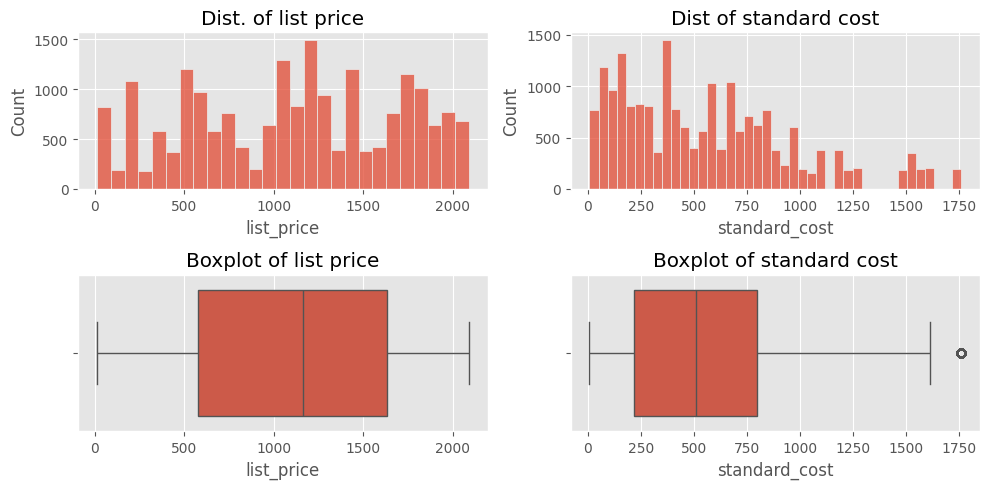

In [18]:
plt.figure(figsize= (10, 5))

plt.subplot(2, 2, 1)
sns.histplot(data= df_transactions,
             x= 'list_price',
             bins= 'auto')
plt.title('Dist. of list price')

plt.subplot(2, 2, 3)
sns.boxplot(data= df_transactions,
            x= 'list_price')
plt.title('Boxplot of list price')

plt.subplot(2, 2, 2)
sns.histplot(data= df_transactions,
             x= 'standard_cost',
             bins= 'auto')
plt.title('Dist of standard cost')

plt.subplot(2, 2, 4)
sns.boxplot(data= df_transactions,
            x= 'standard_cost')
plt.title('Boxplot of standard cost')

plt.tight_layout()
plt.show()

**Outliers:**

- ***standard cost = 1750 is an outlier***

In [19]:
# shape of outlier records
print(f"shape: {df_transactions[df_transactions['standard_cost'] > 1750].shape}\n\n")

shape: (195, 13)




In [20]:
# drop
df_transactions= df_transactions[df_transactions['standard_cost'] < 1750]

df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19608 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    19608 non-null  int64         
 1   product_id        19608 non-null  int64         
 2   customer_id       19608 non-null  int64         
 3   transaction_date  19608 non-null  datetime64[ns]
 4   online_order      19608 non-null  bool          
 5   order_status      19608 non-null  object        
 6   brand             19608 non-null  object        
 7   product_line      19608 non-null  object        
 8   product_class     19608 non-null  object        
 9   product_size      19608 non-null  object        
 10  list_price        19608 non-null  float64       
 11  standard_cost     19608 non-null  float64       
 12  f_sold_date       19608 non-null  datetime64[ns]
dtypes: bool(1), datetime64[ns](2), float64(2), int64(3), object(5)
memory usage: 2.0+

In [21]:
# reset index
df_transactions.reset_index(drop= True, inplace= True)

# check
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19608 entries, 0 to 19607
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    19608 non-null  int64         
 1   product_id        19608 non-null  int64         
 2   customer_id       19608 non-null  int64         
 3   transaction_date  19608 non-null  datetime64[ns]
 4   online_order      19608 non-null  bool          
 5   order_status      19608 non-null  object        
 6   brand             19608 non-null  object        
 7   product_line      19608 non-null  object        
 8   product_class     19608 non-null  object        
 9   product_size      19608 non-null  object        
 10  list_price        19608 non-null  float64       
 11  standard_cost     19608 non-null  float64       
 12  f_sold_date       19608 non-null  datetime64[ns]
dtypes: bool(1), datetime64[ns](2), float64(2), int64(3), object(5)
memory usage:

In [27]:
# check of duplication

print(f"sum of duplicated values= {df_transactions.duplicated().sum()}")

sum of duplicated values= 0


## Cleaning df_NewCustomerList

In [24]:
df_NewCustomerList.head(2)

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.56,0.70,0.8750,0.743750,1,1,1.71875
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.89,0.89,1.1125,0.945625,1,1,1.71875


In [25]:
df_NewCustomerList.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   first_name                           1000 non-null   object 
 1   last_name                            971 non-null    object 
 2   gender                               1000 non-null   object 
 3   past_3_years_bike_related_purchases  1000 non-null   int64  
 4   DOB                                  983 non-null    object 
 5   job_title                            894 non-null    object 
 6   job_industry_category                835 non-null    object 
 7   wealth_segment                       1000 non-null   object 
 8   deceased_indicator                   1000 non-null   object 
 9   owns_car                             1000 non-null   object 
 10  tenure                               1000 non-null   int64  
 11  address                        